In [1]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
import random
import csv
from collections import defaultdict
from math import e
from math import pi
import requests
import re

In [2]:
#loading features
feature1= pd.read_csv('Koi_5652_952_540_DataH10.csv', header=None)
feature2= pd.read_csv('Koi_5652_952_540_DataHOG.csv', header=None)
feature3= pd.read_csv('Koi_5652_952_540_DataLBP.csv', header=None)
feature4= pd.read_csv('Koi_5652_952_540_DataRGB.csv', header= None)

In [3]:
feature1.describe()

,0,1,2,3,4,5,6,7,8,9
count,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000
mean,0.063730,0.006475,0.010370,0.007146,0.017603,0.768842,0.047365,0.012375,0.013263,0.052831
std,0.062354,0.009494,0.026997,0.009989,0.025209,0.132953,0.034524,0.010379,0.011589,0.046242
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.281888,0.000000,0.000000,0.000000,0.000000
25%,0.017538,0.000957,0.000957,0.000957,0.003189,0.690370,0.021365,0.005421,0.005421,0.019133
50%,0.040816,0.003508,0.003508,0.004145,0.010842,0.797194,0.034758,0.008610,0.008929,0.041135
75%,0.092634,0.007653,0.007334,0.009088,0.021046,0.869739,0.067921,0.016263,0.018017,0.074617
max,0.338648,0.072066,0.221301,0.130102,0.223852,0.985013,0.203444,0.066327,0.084503,0.300383


In [4]:
feature2.describe()

,0,1,2,3,4,5,6,7,8,9,...,431,432,433,434,435,436,437,438,439,440
count,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,...,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000
mean,0.400644,0.244185,0.258114,0.255997,0.412946,0.229966,0.237999,0.228263,0.270219,0.351678,...,0.255633,0.387038,0.242062,0.260137,0.246689,0.385314,0.247173,0.257163,0.261380,0.275159
std,0.132528,0.166185,0.163035,0.168197,0.163445,0.168472,0.168755,0.168974,0.172869,0.169655,...,0.173078,0.136984,0.169884,0.165802,0.174272,0.142254,0.172336,0.168350,0.170995,0.172885
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002981,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.360578,0.090554,0.107251,0.101982,0.363966,0.071289,0.072214,0.063407,0.106326,0.227197,...,0.095698,0.339709,0.080199,0.100839,0.082853,0.347399,0.083047,0.097894,0.100158,0.111440
50%,0.416650,0.244709,0.269960,0.263869,0.421953,0.222229,0.237659,0.219408,0.306642,0.394015,...,0.256560,0.404347,0.246662,0.280271,0.246239,0.406329,0.253786,0.272661,0.270664,0.312618
75%,0.475380,0.385897,0.395227,0.395164,0.487298,0.377781,0.386982,0.381904,0.408338,0.459984,...,0.397010,0.463774,0.384248,0.397472,0.394900,0.465623,0.388703,0.396454,0.396569,0.412139
max,0.940382,0.693015,0.888204,0.786371,1.000000,0.701930,0.807407,0.675538,0.707021,0.972301,...,0.703802,0.991063,0.706721,0.767297,0.844724,0.915745,0.706413,0.665171,0.665171,0.713933


In [5]:
feature3.describe()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
count,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,...,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000
mean,0.284925,0.042687,0.014194,0.031124,0.003520,0.009301,0.035129,0.000991,0.000110,0.003877,...,0.003619,0.000095,0.001139,0.035804,0.006828,0.002909,0.029942,0.010272,0.035971,0.258758
std,0.038453,0.010361,0.004558,0.007645,0.001510,0.002793,0.009826,0.000814,0.000211,0.001543,...,0.001375,0.000182,0.000667,0.013210,0.002286,0.001248,0.011200,0.003675,0.012203,0.042033
min,0.178890,0.014668,0.002551,0.011798,0.000000,0.002551,0.011798,0.000000,0.000000,0.000638,...,0.000000,0.000000,0.000000,0.009247,0.000957,0.000000,0.005740,0.002232,0.013712,0.148916
25%,0.257972,0.035714,0.010842,0.025829,0.002551,0.007334,0.027742,0.000638,0.000000,0.002870,...,0.002551,0.000000,0.000638,0.025829,0.005102,0.001913,0.022321,0.007653,0.027105,0.228954
50%,0.284120,0.042092,0.013712,0.030612,0.003508,0.009247,0.034439,0.000957,0.000000,0.003827,...,0.003508,0.000000,0.000957,0.033482,0.006696,0.002870,0.027742,0.009885,0.033482,0.256696
75%,0.312819,0.049107,0.016901,0.035714,0.004464,0.011161,0.041454,0.001276,0.000319,0.005102,...,0.004464,0.000000,0.001594,0.042730,0.008291,0.003827,0.035395,0.012436,0.043048,0.285236
max,0.408163,0.087372,0.032207,0.068559,0.009885,0.019133,0.077168,0.020408,0.001913,0.009885,...,0.008929,0.001276,0.003827,0.088329,0.014031,0.007334,0.098852,0.023278,0.098214,0.403061


In [6]:
feature4.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
count,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,...,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000
mean,0.001818,0.002187,0.002651,0.000540,0.000357,0.000278,0.002007,0.002276,0.002712,0.000672,...,0.002726,0.000592,0.000405,0.000319,0.001933,0.002267,0.002747,0.000614,0.000402,0.000305
std,0.000578,0.000376,0.000343,0.000381,0.000247,0.000201,0.000616,0.000399,0.000304,0.000341,...,0.000343,0.000311,0.000223,0.000185,0.000517,0.000337,0.000256,0.000326,0.000223,0.000167
min,0.000995,0.001348,0.000986,0.000005,0.000008,0.000008,0.000948,0.001491,0.001859,0.000015,...,0.000732,0.000010,0.000008,0.000009,0.001094,0.001627,0.001449,0.000009,0.000009,0.000008
25%,0.001345,0.001940,0.002460,0.000135,0.000106,0.000097,0.001483,0.001997,0.002500,0.000405,...,0.002544,0.000322,0.000224,0.000171,0.001506,0.002018,0.002570,0.000367,0.000230,0.000188
50%,0.001668,0.002098,0.002648,0.000572,0.000396,0.000285,0.001912,0.002188,0.002671,0.000769,...,0.002727,0.000619,0.000416,0.000298,0.001816,0.002194,0.002728,0.000639,0.000413,0.000297
75%,0.002141,0.002363,0.002833,0.000853,0.000522,0.000390,0.002436,0.002501,0.002872,0.000937,...,0.002902,0.000840,0.000565,0.000451,0.002280,0.002458,0.002896,0.000869,0.000543,0.000410
max,0.003745,0.003787,0.003783,0.001376,0.001001,0.001161,0.003820,0.003837,0.003823,0.001288,...,0.003719,0.001291,0.000945,0.001083,0.003759,0.003714,0.003723,0.001266,0.001034,0.000966


Assuming normalization has been done

In [40]:
#load target variable file
koi_label= pd.read_csv('Koi_5652_952_540_Labels.csv', header=None)

## 1. Implementing a Prior classifier without using a Python library 

In [8]:
class NaiveBayesClassifier:
    
    def __init__(self):
        self.class_priors = None
        self.conditional_probs = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)
        
        # Compute class priors
        self.class_priors = np.zeros(n_classes)
        for i, c in enumerate(self.classes):
            self.class_priors[i] = np.sum(y == c) / n_samples
        
        # Compute conditional probabilities
        self.conditional_probs = {}
        for i in range(n_features):
            feature_values = np.unique(X[:, i])
            for j, c in enumerate(self.classes):
                class_data = X[y == c, :]
                self.conditional_probs[(i, c)] = {}
                for value in feature_values:
                    self.conditional_probs[(i, c)][value] = (np.sum(class_data[:, i] == value) + 1) / (len(class_data) + len(feature_values))
    
    def predict(self, X):
        n_samples = X.shape[0]
        y_pred = np.zeros(n_samples)
        for i in range(n_samples):
            joint_probs = np.zeros(len(self.classes))
            for j, c in enumerate(self.classes):
                # Compute the joint probability of the features and the class
                joint_prob = np.log(self.class_priors[j])
                for k in range(X.shape[1]):
                    if (k, c) in self.conditional_probs:
                        if X[i, k] in self.conditional_probs[(k, c)]:
                            joint_prob += np.log(self.conditional_probs[(k, c)][X[i, k]])
                        else:
                            # Handle unseen feature values by assigning a small probability
                            joint_prob += np.log(1 / (len(self.conditional_probs[(k, c)]) + 1))
                    else:
                        # Handle unseen features by assigning a small probability
                        joint_prob += np.log(1 / (X[:, k].max() + 1))
                joint_probs[j] = joint_prob
            # Assign the class with the highest joint probability as the predicted class
            y_pred[i] = self.classes[np.argmax(joint_probs)]
        return y_pred

In [41]:
#creating a dataset containing target and feature variables
koi_dataset= pd.concat([feature1, feature2, feature3, feature4, koi_label],axis=1)
koi_dataset.shape

(1635, 556)

In [26]:
koi_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,0
0,0.064732,0.009247,0.004145,0.008929,0.030931,0.774554,0.051658,0.010842,0.009247,0.035714,...,0.000839,0.000723,0.000557,0.002131,0.002496,0.002878,0.001133,0.000896,0.000643,2
1,0.257653,0.003508,0.001276,0.003508,0.016901,0.463329,0.086735,0.019770,0.020408,0.126913,...,0.000755,0.000445,0.000445,0.003027,0.002333,0.002319,0.001039,0.000608,0.000630,4
2,0.010204,0.006696,0.005740,0.006696,0.018495,0.889668,0.029018,0.008610,0.004464,0.020408,...,0.000528,0.000461,0.000333,0.002437,0.002670,0.002951,0.001059,0.000856,0.000640,5
3,0.002551,0.002551,0.001913,0.003827,0.013074,0.933992,0.020727,0.004464,0.005740,0.011161,...,0.001131,0.000917,0.000679,0.001138,0.001706,0.002297,0.000067,0.000066,0.000069,7
4,0.077806,0.012117,0.003189,0.004145,0.028380,0.748724,0.070472,0.011798,0.005740,0.037628,...,0.000810,0.000700,0.000539,0.002263,0.002589,0.002958,0.001114,0.000893,0.000633,2


In [24]:
#creating training and testing data according to sizes given: 916 719
data_train= koi_dataset.iloc[:916, :]
data_test=  koi_dataset.iloc[:719, :]

In [27]:
#creating training data for features
#as NB without python lirary cannot directly compute both dataframe and numpy array 
x= data_train.iloc[:,:-1].to_numpy()
x.shape

(916, 555)

In [13]:
#creating testing data for features 
x_test= data_test.iloc[:, :-1].to_numpy()
x_test.shape

(719, 555)

In [28]:
#creating training data for target variable
y = data_train.iloc[:,-1]
y.shape

(916,)

In [19]:
#creating testing data for target variable
y_test= data_test.iloc[:, -1].to_numpy()
y_test.shape

(719,)

In [16]:
nb =NaiveBayesClassifier()

In [17]:
# Train the classifier on the dataset
nb.fit(x, y)

In [18]:
# Make predictions on the same dataset
y_pred = nb.predict(x_test)

In [20]:
# Compute the accuracy of the classifier
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Accuracy: 1.0


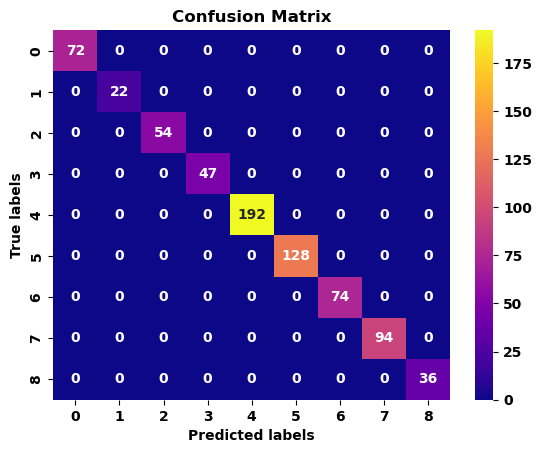

In [35]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap= 'plasma')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.savefig("nb_koi_confusion_matrix.png")
plt.show()

## 2. Bagging Classifier

In [36]:
#concatenating all features 
koi_features = pd.concat([feature1, feature2, feature3, feature4],axis=1)

In [42]:
#converting to numpy array because sklearn expects target variable to be in numpy array
koi_labels= koi_label.to_numpy()

In [43]:
#spliting dataframe into given training and testing sizes: 916 719
training= 916
testing=  719
test_size = testing / (training + testing)
test_size 

0.4397553516819572

In [44]:
# X is the input features and y is the target variable
X_train, X_test, Y_train, Y_test = train_test_split(koi_features, koi_labels, test_size=test_size, random_state=42)

# test_size specifies the proportion of the dataset to include in the test split
# random_state ensures that the same random split is generated each time the code is run

In [67]:
print(X_train.shape, Y_train.shape)

(916, 555) (916, 1)


In [66]:
print(Y_test.shape, X_test.shape)

(719, 1) (719, 555)


In [45]:
# create the base classifier
base_classifier = DecisionTreeClassifier()

# create the ensemble classifier using bagging
bagging_classifier = BaggingClassifier(base_estimator=base_classifier, 
                                        n_estimators=10, 
                                        random_state=42)

# fit the model on training data
bagging_classifier.fit(X_train, Y_train)

# predict the class labels for test data
bagging_pred = bagging_classifier.predict(X_test)

# evaluate the performance of the classifier
bagging_acc= accuracy_score(Y_test, bagging_pred)
print("Bagging Accuracy: {:.2f}".format(bagging_acc))

Bagging Accuracy: 0.92


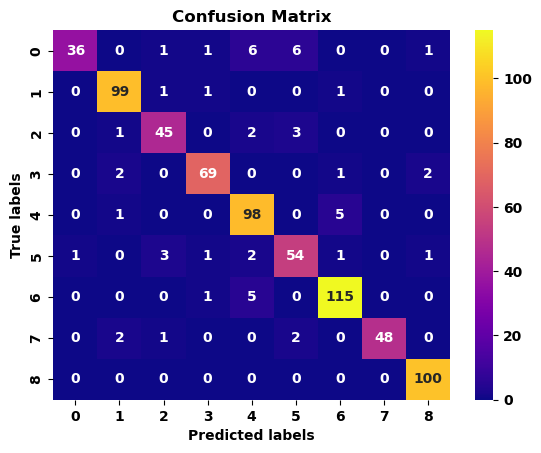

In [63]:
# Create a confusion matrix
cm_bag = confusion_matrix(Y_test, bagging_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm_bag, annot=True, fmt='g', cmap='plasma')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.savefig("bagging_koi_confusion_matrix.png")
plt.show()

## 3. Linear Discriminant Analysis Classifier

In [48]:
# Create an instance of the LDA model
LDA = LinearDiscriminantAnalysis()

# Fit the LDA model to the training data
LDA.fit(X_train, Y_train)

# Predict the target values for the testing data
LDA_pred = LDA.predict(X_test)

#evaluate the performance of the classifier
LDA_acc = accuracy_score(Y_test, LDA_pred)
print("LDA Accuracy: {:.2f}".format(LDA_acc))

LDA Accuracy: 0.96


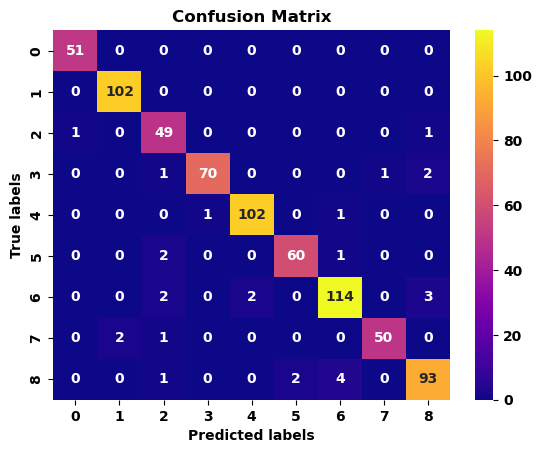

In [49]:
# Create a confusion matrix
cm = confusion_matrix(Y_test, LDA_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='plasma')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.savefig("LDA_koi_confusion_matrix.png")

plt.show()

## 4. KNeighbors Classifier

In [50]:
# Create an instance of the KNN model with k=5
KNN = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN model to the training data
KNN.fit(X_train, Y_train)

# Predict the target values for the testing data
KNN_pred = KNN.predict(X_test)

#evaluate the performance of the classifier
KNN_acc = accuracy_score(Y_test, KNN_pred)
print("KNN Accuracy: {:.2f}".format(KNN_acc))

KNN Accuracy: 0.91


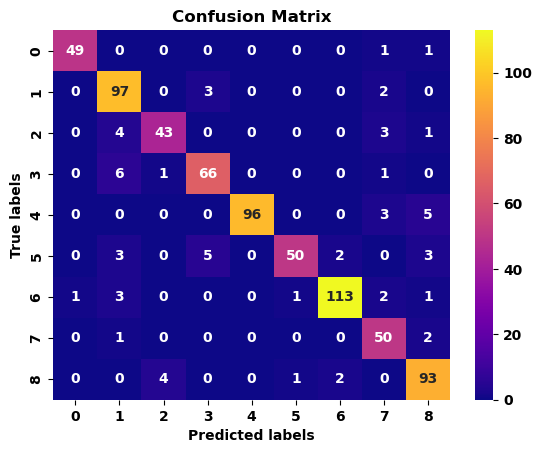

In [51]:
# Create a confusion matrix
cm = confusion_matrix(Y_test, KNN_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='plasma')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.savefig("KNN_koi_confusion_matrix.png")
plt.show()

## 5. Decision Tree Classifier

In [52]:
# Create an instance of the Decision Tree model with max depth of 3
Tree = DecisionTreeClassifier(max_depth=20)

# Fit the Decision Tree model to the training data
Tree.fit(X_train, Y_train)

# Predict the target values for the testing data
Tree_pred = Tree.predict(X_test)

#evaluate the performance of the classifier
Tree_acc = accuracy_score(Y_test, Tree_pred)
print("Decision Tree Accuracy: {:.2f}".format(Tree_acc))

Decision Tree Accuracy: 0.86


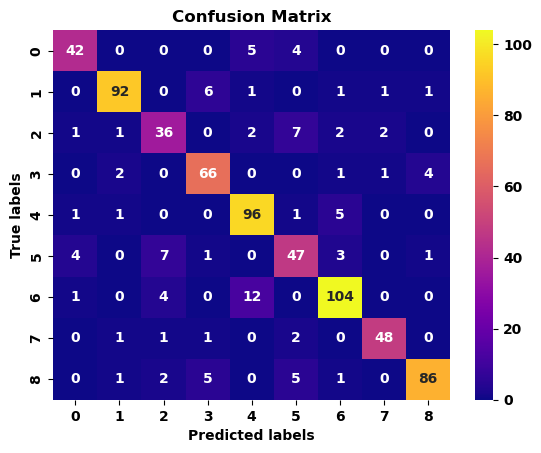

In [54]:
# Create a confusion matrix
cm = confusion_matrix(Y_test, Tree_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='plasma')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.savefig("Tree_koi_confusion_matrix.png")
plt.show()

## 6. Random Forest Classifier

In [56]:
# Create an instance of the Random Forest model with 100 trees
RFC = RandomForestClassifier()

# Fit the Random Forest model to the training data
RFC.fit(X_train, Y_train)

# Predict the target values for the testing data
RFC_pred = RFC.predict(X_test)

#evaluate the performance of the classifier
RFC_acc = accuracy_score(Y_test, RFC_pred)
print("Random Forest Accuracy: {:.2f}".format(RFC_acc))

Random Forest Accuracy: 0.97


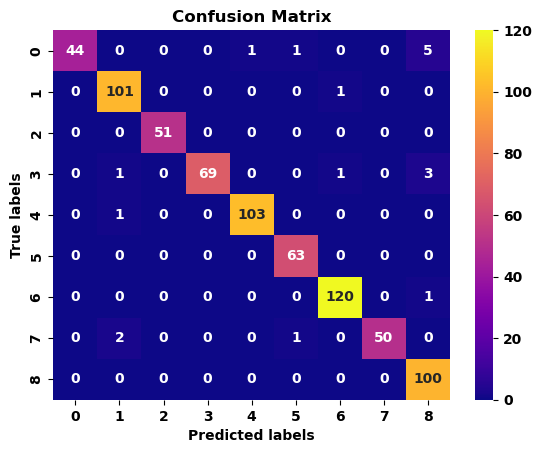

In [57]:
# Create a confusion matrix
cm = confusion_matrix(Y_test, RFC_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='plasma')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.savefig("rfc_koi_confusion_matrix.png")
plt.show()

## 7. SVM model

In [58]:
# Create an instance of the SVM model
svm = SVC(kernel='linear', C=1)

# Fit the SVM model to the training data
svm.fit(X_train, Y_train)

# Predict the target values for the testing data
svm_pred = svm.predict(X_test)

#evaluate the performance of the classifier
svm_acc = accuracy_score(Y_test, svm_pred)
print("SVM Accuracy: {:.2f}".format(svm_acc))

SVM Accuracy: 0.85


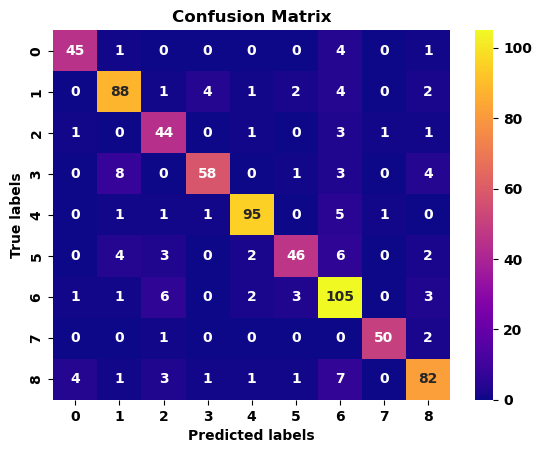

In [60]:
# Create a confusion matrix
cm = confusion_matrix(Y_test, svm_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='plasma')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.savefig("svm_koi_confusion_matrix.png")
plt.show()

In [61]:
# Create a dictionary of the accuracy scores
results = {'Classifier': ['Largest prior', 'Decision Tree', 'KNN', 'Bagging', 'SVM', 'LDA', 'Random Forest'],
           'Accuracy': [accuracy, Tree_acc, KNN_acc, bagging_acc, svm_acc, LDA_acc, RFC_acc]}

# Create a Pandas dataframe from the dictionary
df_koi_results = pd.DataFrame(results)

# Sort the dataframe by accuracy in descending order
df_koi_results = df_koi_results.sort_values(by='Accuracy', ascending=False)

# Print the dataframe
df_koi_results

,Classifier,Accuracy
0,Largest prior,1.000000
6,Random Forest,0.974965
5,LDA,0.961057
3,Bagging,0.923505
2,KNN,0.913769
1,Decision Tree,0.858136
4,SVM,0.852573


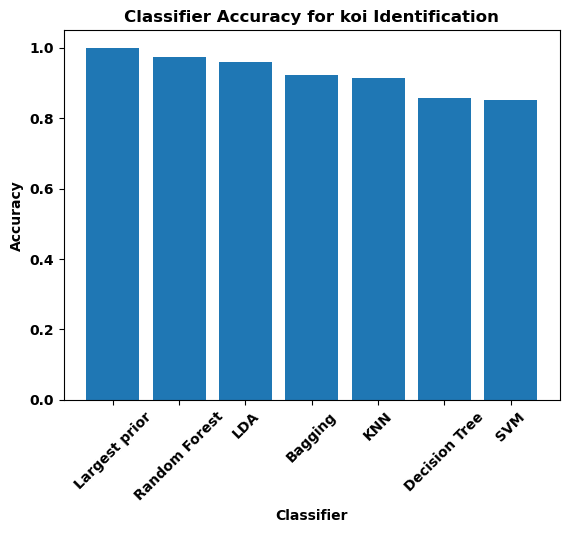

In [62]:
# Create a bar chart of the accuracy scores
plt.bar(df_koi_results['Classifier'], df_koi_results['Accuracy'])
plt.xticks(rotation=45)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy for koi Identification')

plt.savefig("barchart showing koi Classifier Accuracy.png")
plt.show()